<a href="https://colab.research.google.com/github/shreya-rm/LGMVIP-DataScience/blob/main/lgm3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LetsGrowMore - Virtual Internship Program(VIP)

#Data Science Internship

**Task 3 : Exploratory Data Analysis on Dataset - Terrorism**

*Author : Shreya RM*

**Importing the required libraries**

In [20]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import signal

**Importing the data**

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='cp1252',low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
df.shape

(1212, 135)

In [5]:
df['casualities'] = df['nkill'] + df['nwound']

In [6]:
df.shape

(1212, 136)

In [7]:
print("country with highest terrorist attacks:",df['country_txt'].value_counts().index[0])
print("maximum people killed in an attack:",df['nkill'].max())
print("year with the most attacks:",df['iyear'].value_counts().idxmax())
print("year with the least attacks:",df['iyear'].value_counts().idxmin())
print("most attack types:",df['attacktype1_txt'].value_counts().idxmax())
print("most active group:",df['gname'].value_counts().index[1])

country with highest terrorist attacks: United States
maximum people killed in an attack: 47.0
year with the most attacks: 1970
year with the least attacks: 1972
most attack types: Bombing/Explosion
most active group: Left-Wing Militants


**Static Visualisations**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



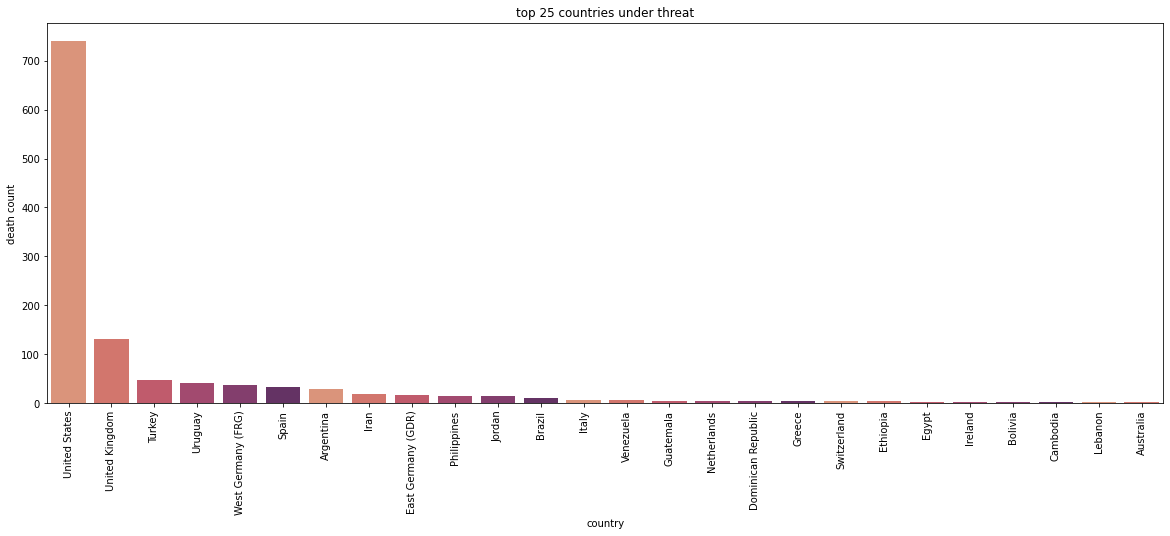

In [8]:
plt.figure(figsize = (20,7))
p = df['country_txt'].value_counts().index
sns.countplot(df['country_txt'],
              order = p[:26],
              palette = sns.color_palette("flare"))
plt.xlabel('country')
plt.ylabel('death count')
plt.title('top 25 countries under threat')
plt.xticks(rotation = 90)
plt.show()

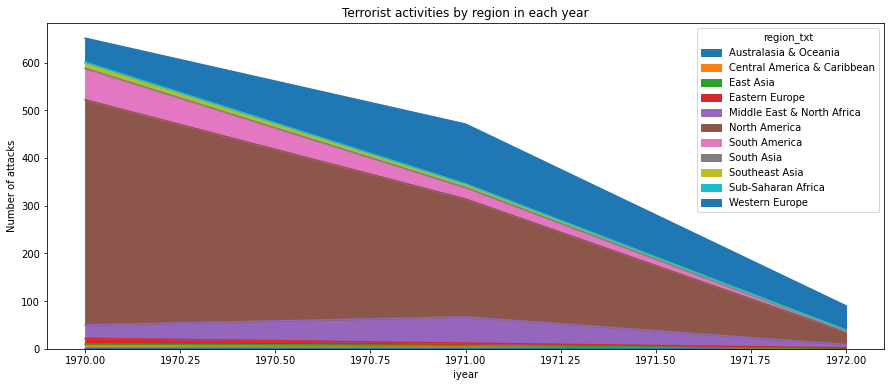

In [9]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activities by region in each year')
plt.ylabel('Number of attacks')
plt.show()

**Interactive Visualisation**

In [13]:
fig = px.choropleth(df, locations='country_txt',locationmode='country names',color='nkill', animation_group='nkill', animation_frame='iyear',
                    labels = {'iyear':'Year','nkill':'Number of Deaths', 'country_txt':'Country'},
                    title = 'Number of Deaths in a year in different Countries')
fig.show()

In [16]:
pip install plotly==4.5

     |████████████████████████████████| 7.1 MB 7.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


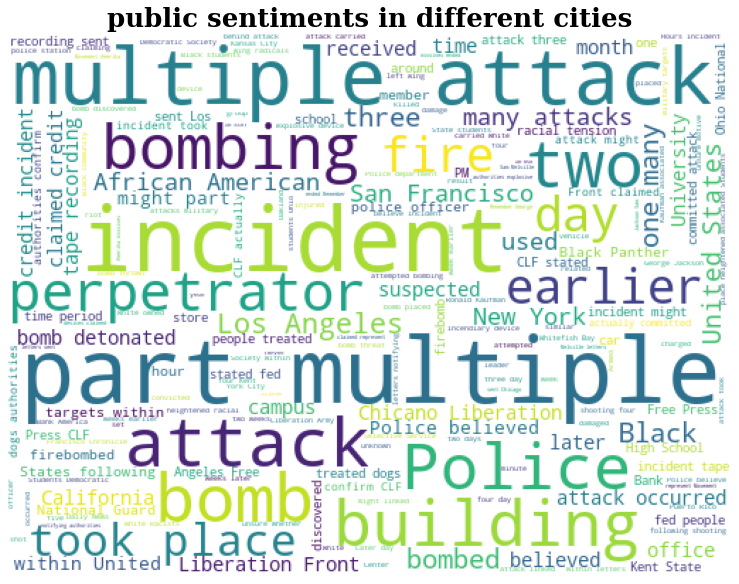

In [18]:
cities = df.addnotes.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'white',
                      width = 512,
                      height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud) 
plt.title('public sentiments in different cities',
          fontdict={'family': 'serif',
                    'color': 'black',
                    'weight' : 'bold',
                    'size':26,}) 
plt.show()                    

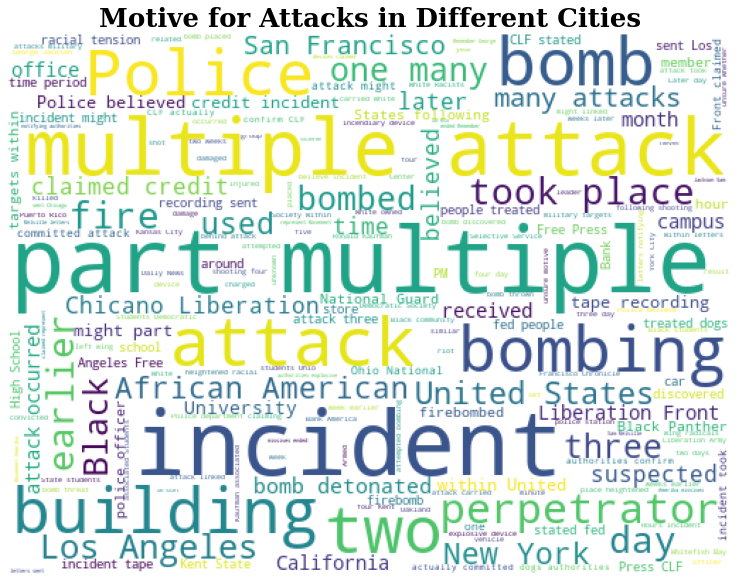

In [19]:
cities = df.addnotes.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'white',
                      width = 512,
                      height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud) 
plt.title('Motive for Attacks in Different Cities',
          fontdict={'family': 'serif',
                    'color': 'black',
                    'weight' : 'bold',
                    'size':26,}) 
plt.show()                    